In [1]:
from importing_sb import *
from pitch_plotting import *
import numpy as np
import pandas as pd

data_dir = '/Users/jm533/Documents/GitHub/football_analytics/open-data/data/'

comp_data = open_data(data_dir + 'competitions.json')
la_liga_seasons = [i['season_id'] for i in comp_data if i['competition_id'] == 11]
match_data = [sorted(open_data(data_dir + 'matches/11/{}.json'.format(i)), key = lambda k:k['match_date']) for i in la_liga_seasons]
#event_data = [[open_data(data_dir + 'events/{}.json'.format(j['match_id'])) for j in i] for i in match_data]
#match_data = [pd.DataFrame(open_data(data_dir + 'matches/11/{}.json'.format(i))).sort_values('match_week',ascending=True) for i in la_liga_seasons]
#event_data = [[pd.DataFrame(open_data(data_dir + 'events/{}.json'.format(j))) for j in i['match_id']] for i in match_data]


comp_df = pd.DataFrame(comp_data)
#match_df = pd.DataFrame(match_data)

In [8]:
years = list(range(2015,2003,-1))
match_id = {}
for i in range(len(years)):
    df = pd.DataFrame(match_data[i])
    match_id[str(years[i])] = df['match_id'].values

In [9]:
event_data = {}
for year in years:
    event_data[str(year)] = []
    for match in match_id[str(year)]:
        event_data[str(year)].append(open_data(data_dir + 'events/{}.json'.format(str(match))))

In [15]:
event_data_15 = [i for match in event_data['2015'] for i in match]

In [19]:
messi = 'Lionel Andrés Messi Cuccittini'

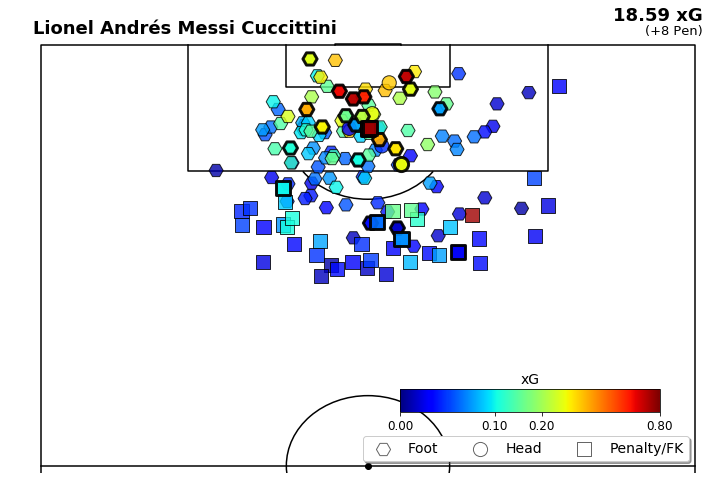

In [20]:
shot_map_player(event_data_15,messi,'w','k','c','jet')

## Shots

In [18]:
shots = {}
for year in years:
    shots[str(year)] = [get_shots(match) for match in event_data[str(year)]]

In [21]:
shots_seas = {}
for year in shots:
    shots_seas[str(year)] = pd.concat(shots[str(year)])
    shots_seas[str(year)].reset_index(inplace=True)

In [22]:
m_shots_seas = {}
for year in years:
    m_shots_seas[str(year)] = shots_seas[str(year)][shots_seas[str(year)]['player'] == messi]

In [23]:
m_h = [len(m_shots_seas[str(i)][m_shots_seas[str(i)]['body_part'] == 'Head']) for i in years]
m_h_g=[len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Head')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years]
m_lf = [len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Left Foot')]) for i in years]
m_lf_g = [len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Left Foot')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years]
m_rf = [len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Right Foot')]) for i in years]
m_rf_g = [len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Right Foot')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years]

h = [len(shots_seas[str(i)][shots_seas[str(i)]['body_part'] == 'Head']) for i in years]
h_g=[len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Head')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years]
lf = [len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Left Foot')]) for i in years]
lf_g = [len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Left Foot')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years]
rf = [len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Right Foot')]) for i in years]
rf_g = [len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Right Foot')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years]

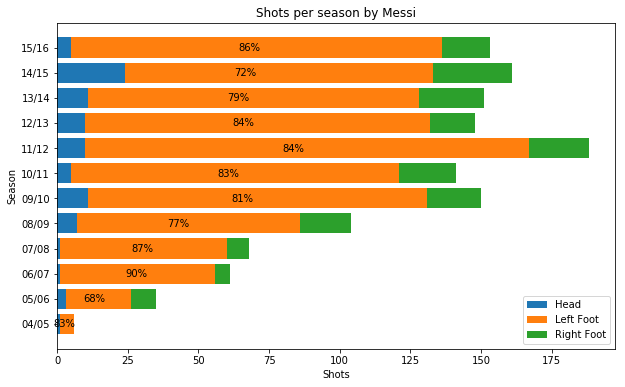

In [24]:
ind = list(reversed(np.arange(len(years))))
seasons = ['15/16','14/15','13/14','12/13','11/12','10/11','09/10','08/09','07/08','06/07','05/06','04/05']

fig, ax = plt.subplots(figsize=(10,6))
p1 = ax.barh(ind, m_h)
p2 = ax.barh(ind, m_lf,left=m_h)
p3 = ax.barh(ind, m_rf,left=m_lf)

#labels = ax.get_xticklabels()
ax.set_yticks(ind)
ax.set_yticklabels(seasons)
ax.set_xlabel('Shots')
ax.set_ylabel('Season')
ax.set_title('Shots per season by Messi')
plt.legend((p1[0], p2[0], p3[0]), ('Head', 'Left Foot', 'Right Foot'),loc=4)

for i in range(len(ind)):
    ax.annotate('{:.0f}%'.format((m_lf[i]/sum([m_h[i],m_lf[i],m_rf[i]])) * 100),
                    xy=(m_lf[i] / 2, ind[i]), xytext=(0,0),
                    textcoords="offset points",
                    ha='center', va='center')

plt.show()

/Users/jm533/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


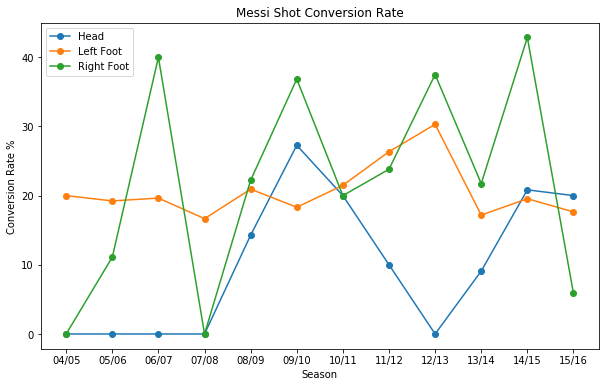

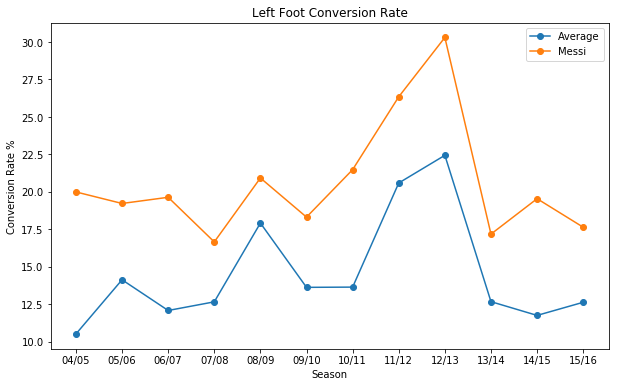

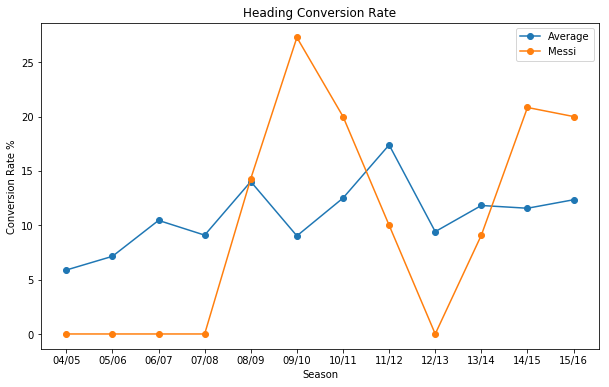

In [25]:
seasons = ['15/16','14/15','13/14','12/13','11/12','10/11','09/10','08/09','07/08','06/07','05/06','04/05']
ind = list(reversed(np.arange(len(seasons))))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(m_h_g) / np.array(m_h)) * 100, '-o',label='Head')
ax.plot(ind, (np.array(m_lf_g) / np.array(m_lf)) * 100, '-o',label='Left Foot')
ax.plot(ind, np.nan_to_num((np.array(m_rf_g) / np.array(m_rf))) * 100, '-o',label='Right Foot')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Messi Shot Conversion Rate')
ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(lf_g) / np.array(lf)) * 100, '-o',label='Average')
ax.plot(ind, (np.array(m_lf_g) / np.array(m_lf)) * 100, '-o',label='Messi')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Left Foot Conversion Rate')
ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(h_g) / np.array(h)) * 100, '-o',label='Average')
ax.plot(ind, (np.array(m_h_g) / np.array(m_h)) * 100, '-o',label='Messi')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Heading Conversion Rate')
ax.legend(loc='best')


In [26]:
print(np.mean((np.array(h_g) / np.array(h)) * 100))
print(np.mean((np.array(m_h_g) / np.array(m_h)) * 100))

10.886390340275925
10.123556998557


## Passes

In [27]:
passes = {}
for year in years:
    passes[str(year)] = [get_pass(match) for match in event_data[str(year)]]

In [28]:
passes_seas = {}
for year in passes:
    passes_seas[str(year)] = pd.concat(passes[str(year)])
    passes_seas[str(year)].reset_index(inplace=True)

In [29]:
m_pass_seas = {}
m_pass_op_seas ={}
for year in years:
    m_pass_seas[str(year)] = passes_seas[str(year)][passes_seas[str(year)]['player'] == messi]
    m_pass_op_seas[str(year)] = passes_seas[str(year)][(passes_seas[str(year)]['player'] == messi)&
                                                       (passes_seas[str(year)]['pass_type'] == 'Standard')]

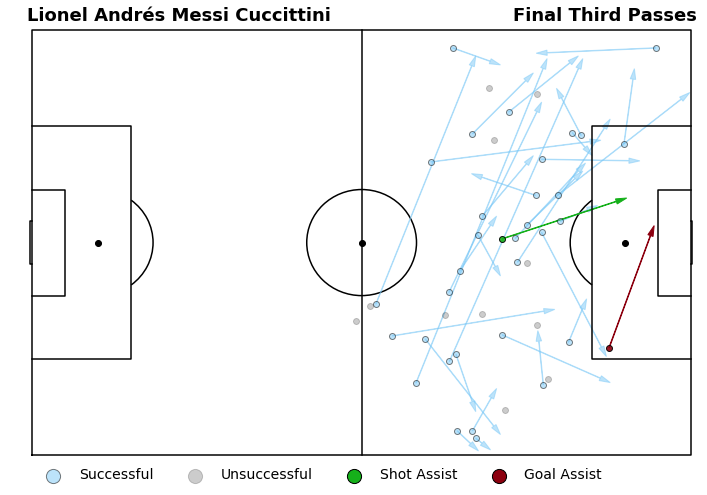

In [30]:
pass_map_player(event_data['2015'][3],messi,'w','b','t')

### Pass Quantity

In [34]:
get_player_info(event_data['2015'][3],messi)

position      Center Attacking Midfield
number                               10
start                               Yes
sub_off                              No
sub_on                               No
min_start                             0
sec_start                             0
min_end                              92
sec_end                              15
sec_played                         5535
Name: Lionel Andrés Messi Cuccittini, dtype: object

In [35]:
m_90_played = []
for year in years:
    tot = 0
    for i in range(len(event_data[str(year)])):
        tot += get_player_info(event_data[str(year)][i],messi).sec_played
        
    m_90_played.append((tot / 60) / 90)

In [36]:
m_pass_op_tot = [len(m_pass_op_seas[str(i)]) for i in years]
m_ft_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['end_x'] >= 80.]) for i in years]
m_box_pass_op_tot = [len(m_pass_op_seas[str(i)][(m_pass_op_seas[str(i)]['end_x'] >= 102.)&
                                                (m_pass_op_seas[str(i)]['end_y'] >= 18.)&
                                                (m_pass_op_seas[str(i)]['end_y'] <= 62.)]) for i in years]

In [39]:
m_pass_p90 = np.array(m_pass_op_tot) / np.array(m_90_played)
m_ft_pass_p90 = np.array(m_ft_pass_op_tot) / np.array(m_90_played)
m_box_pass_p90 = np.array(m_box_pass_op_tot) / np.array(m_90_played)

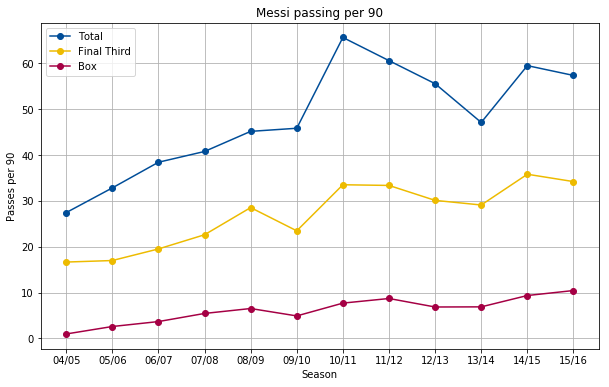

In [40]:
ind = np.flip(np.arange(len(years)))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind,m_pass_p90,'-o',c='#004d98',label='Total')
ax.plot(ind,m_ft_pass_p90,'-o',c='#edbb00',label='Final Third')
ax.plot(ind,m_box_pass_p90,'-o',c='#a50044',label='Box')

ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Passes per 90',title='Messi passing per 90')
ax.legend(loc=2)

ax.grid(True)

plt.show()

### What about types of passes?

In [81]:
m_thru_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['technique'] == 'Through Ball']) for i in years]
m_cross_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['cross'] == True]) for i in years]
m_switch_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['switch'] == True]) for i in years]

In [82]:
m_thru_p90 = np.array(m_thru_pass_op_tot) / np.array(m_90_played)
m_cross_p90 = np.array(m_cross_pass_op_tot) / np.array(m_90_played)
m_switch_p90 = np.array(m_switch_pass_op_tot) / np.array(m_90_played)

In [212]:
man_dates = [0,3+(5/12),7+(6/12),8+(7/12),9+(5/12)]
man_names = ['Rijkaard','Guardiola','Vilanova','Martino','Enrique']

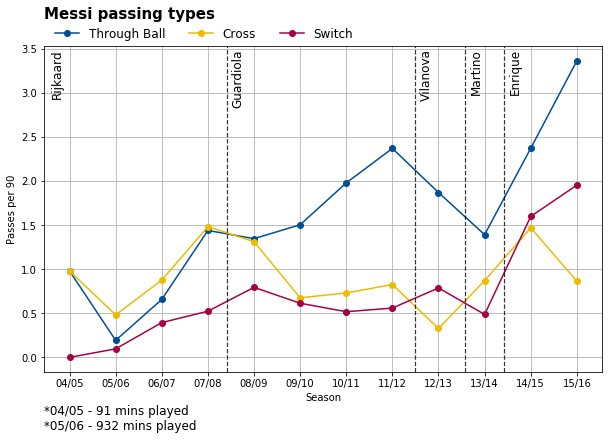

In [213]:
ind = np.flip(np.arange(len(years)))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind,m_thru_p90,'-o',c='#004d98',label='Through Ball')
ax.plot(ind,m_cross_p90,'-o',c='#edbb00',label='Cross')
ax.plot(ind,m_switch_p90,'-o',c='#a50044',label='Switch')

for i in range(len(man_dates)-1):
    ax.axvline(man_dates[i+1],0,1,c='k',ls='--',lw=1.2,alpha=0.8)
    ax.text(man_dates[i+1]+0.1,3.5,man_names[i+1],fontsize=12,ha='left',va='top',rotation=90)
    
ax.text(managers[0]-0.4,3.5,man_names[0],fontsize=12,ha='left',va='top',rotation=90)
    
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Passes per 90')
ax.legend(loc=2,bbox_to_anchor=(0,1.09),ncol=3,frameon=False,fontsize=12)

ax.text(0.0,1.12,'Messi passing types',ha='left', va='top',transform=ax.transAxes,fontsize=15,fontweight='semibold')
ax.text(0.0, -0.1, '*04/05 - 91 mins played\n*05/06 - 932 mins played', ha='left', va='top', transform=ax.transAxes, fontsize=12)

ax.grid(True)

plt.show()

In [94]:
m_pass_match = {}
m_pass_match['2015'] = []
for i in range(len(passes['2015'])):
    m_pass_match['2015'].append(passes['2015'][i][(passes['2015'][i]['player'] == messi)&
                                                 (passes['2015'][i]['pass_type'] == 'Standard')])

In [96]:
m_pass_op_match = []
for i in range(len(m_pass_match['2015'])):
    m_pass_op_match.append(len(m_pass_match['2015'][i]))

In [121]:
test = pd.DataFrame({'2015': m_pass_op_match})
test.rolling(6).mean();

## Carries and Dribbles

In [217]:
test = clean_event_data(event_data['2015'][0])

In [229]:
def get_carry(data):
    data = data
    import pandas as pd
    
    i = 0
    carry_data = []
    for i in range(0,len(data)):
        if("carry" in data[i]):
            carry_data.append(data[i])
        else:
            pass
    
    i = 0
    ind = []
    per = []
    m = []
    s = []
    ty = []
    ptm = []
    pat = []
    tm = []
    pl = []
    x = []
    y = []
    dur = []
    psr = []
    end_x = []
    end_y = []
    
    for i in range(len(carry_data)):
        if "index" in carry_data[i]:
            ind.append(carry_data[i]['index'])
        else:
            ind.append(0)
    
        if "period" in carry_data[i]:
            per.append(carry_data[i]['period'])
        else:
            per.append(None)
        
        if "minute" in carry_data[i]:
            m.append(carry_data[i]['minute'])
        else:
            m.append(None)
            
        if "second" in carry_data[i]:
            s.append(carry_data[i]['second'])
        else:
            s.append(None)
            
        if "type" in carry_data[i]:
            ty.append(carry_data[i]['type']['name'])
        else:
            ty.append(None)
            
        if "possession_team" in carry_data[i]:
            ptm.append(carry_data[i]['possession_team']['name'])
        else:
            ptm.append(None)
            
        if "play_pattern" in carry_data[i]:
            pat.append(carry_data[i]['play_pattern']['name'])
        else:
            pat.append(None)
            
        if "team" in carry_data[i]:
            tm.append(carry_data[i]['team']['name'])
        else:
            tm.append(None)
            
        if "player" in carry_data[i]:
            pl.append(carry_data[i]['player']['name'])
        else:
            pl.append(None)
            
        if "location" in carry_data[i]:
            x.append(carry_data[i]['location'][0])
            y.append(carry_data[i]['location'][1])
        else:
            x.append(None)
            y.append(None)
            
        if "duration" in carry_data[i]:
            dur.append(carry_data[i]['duration'])
        else:
            dur.append(None)
            
        if "under_pressure" in carry_data[i]:
            psr.append(carry_data[i]['under_pressure'])
        else:
            psr.append(None)
            
        if "end_location" in carry_data[i]['carry']:
            end_x.append(carry_data[i]['carry']['end_location'][0])
            end_y.append(carry_data[i]['carry']['end_location'][1])
        else:
            end_x.append(None)
            end_y.append(None)
            
    carries = pd.DataFrame()
    carries['index'] = ind
    carries['period'] = per
    carries['minute'] = m
    carries['second'] = s
    carries['type'] = ty
    carries['pos_team'] = ptm
    carries['play_pattern'] = pat
    carries['team'] = tm
    carries['player'] = pl
    carries['x'] = x
    carries['y'] = y
    carries['duration'] = dur
    carries['under_pressure'] = psr
    carries['end_x'] = end_x
    carries['end_y'] = end_y
        
    return carries

In [245]:
car = get_carry(event_data['2015'][0])
m_car = car[car['player'] == messi]
m_car_prog = m_car

In [247]:
car

,index,period,minute,second,type,pos_team,play_pattern,team,player,x,y,duration,under_pressure,end_x,end_y
0,7,1,0,0,Carry,Athletic Bilbao,From Kick Off,Athletic Bilbao,Javier Eraso Goñi,61.2,45.5,0.808500,None,59.7,46.4
1,10,1,0,2,Carry,Athletic Bilbao,From Kick Off,Athletic Bilbao,Aymeric Laporte,29.7,30.8,2.890016,None,36.2,31.3
2,13,1,0,11,Carry,Barcelona,Regular Play,Barcelona,Claudio Andrés Bravo Muñoz,14.8,35.0,5.340547,None,14.8,35.5
3,16,1,0,18,Carry,Barcelona,Regular Play,Barcelona,Javier Alejandro Mascherano,16.1,64.7,0.040000,None,15.9,64.5
4,19,1,0,20,Carry,Barcelona,Regular Play,Barcelona,Claudio Andrés Bravo Muñoz,7.5,41.8,1.287674,None,7.7,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,3752,2,93,28,Carry,Athletic Bilbao,From Free Kick,Athletic Bilbao,Óscar de Marcos Arana,86.6,14.7,1.131300,None,86.6,14.7
767,3759,2,93,55,Carry,Barcelona,From Throw In,Barcelona,Luis Alberto Suárez Díaz,75.1,72.6,0.040000,None,75.1,72.6
768,3763,2,93,56,Carry,Barcelona,From Throw In,Barcelona,Lionel Andrés Messi Cuccittini,71.7,77.9,0.232000,True,70.6,77.7
769,3769,2,93,58,Carry,Barcelona,From Throw In,Barcelona,Sergi Roberto Carnicer,71.1,67.5,1.040900,True,70.6,68.6


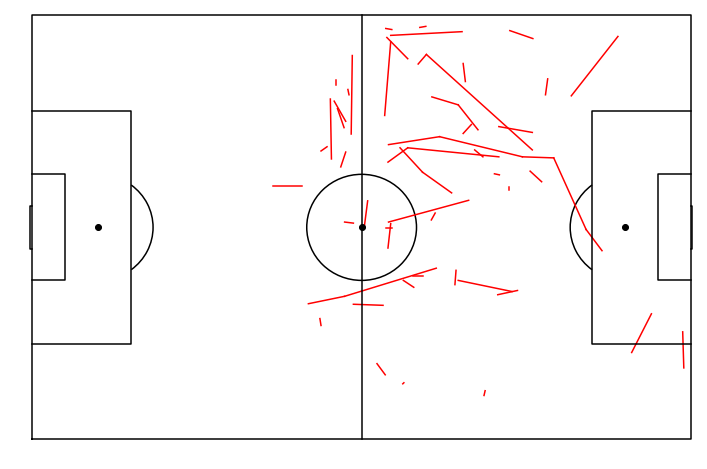

In [246]:
fig, ax = draw_pitch('w','k','h','f')

x = m_car['x'].values
y = m_car['y'].values
xe = m_car['end_x'].values
ye = m_car['end_y'].values

ax.plot([x,xe],[y,ye],'r')
plt.show()